In [92]:
# Importing limraries to be used
# For manipulating the data
import pandas as pd
import numpy as np

# For visulaizing the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To display all data ( regardless of their number or their width )
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


In [93]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [94]:
Range = [18,25,30,40,68]
for i in range (1,len(Range)):
    mask =  (df['BMI'] >= Range[i-1]) & (df['BMI'] < Range[i])
    df.loc[(df['SkinThickness'] == 0) & mask,'SkinThickness'] = df[ mask & (df['SkinThickness'] != 0) ]['SkinThickness'].median()

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


In [96]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,28.296875,10.098234,0.000,22.00000,30.0000,34.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [97]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [98]:
df.duplicated().sum()

0

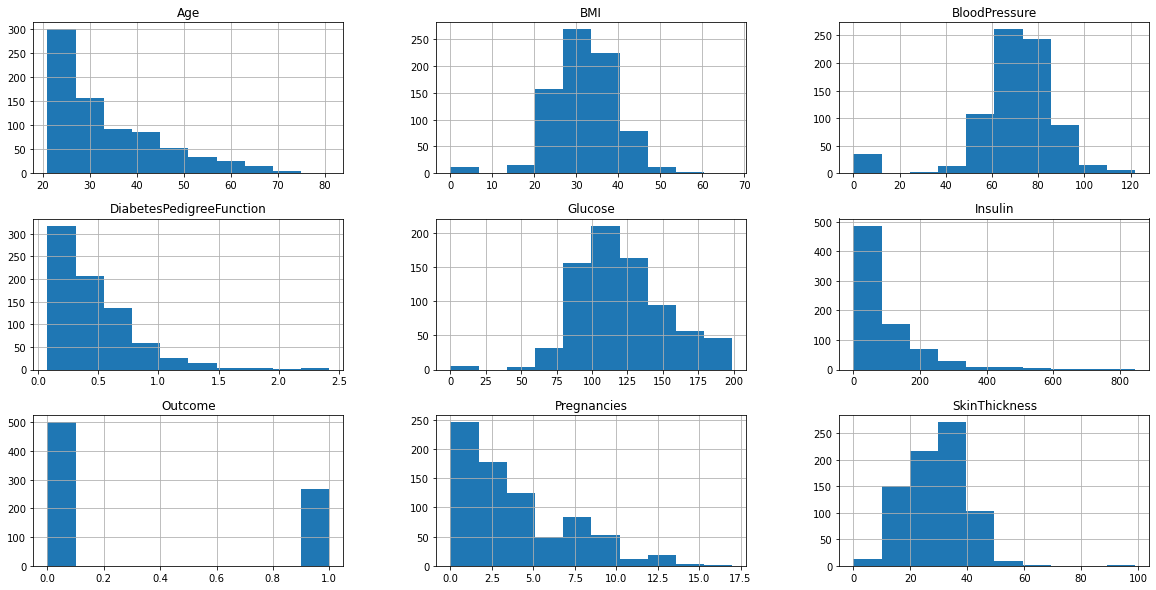

In [99]:
df.hist(figsize=(20,10));

> according to the plots it's impossible for(Glucose - BloodPressure - SkinThickness - Insulin - BMI -DiabetesPedigreeFunction)
> to be zero so lets take alook about this columns

In [100]:
# some function helps to not repeat code
def Boxplot(col):
    sns.boxplot(data=df,x = col)

def Countplot(col):
    sns.countplot(data = df ,x = col , hue = "Outcome")
    
    
def get_zero(col):
    no_of_zeros = df[df[col] == 0].shape[0]
    precentage  = no_of_zeros / df.shape[0] * 100
    return no_of_zeros , precentage

def fillna(col,method):
    df.loc[df[col] ==0, col] = np.NaN
    if method == 'mean':
        return df[col].fillna(df[col].mean(),inplace=True)
    elif method == 'median':
        return df[col].fillna(df[col].median(),inplace=True)

## Glucose

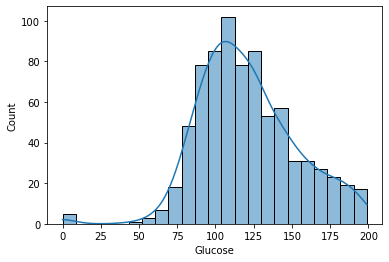

In [101]:
sns.histplot(data = df , x= "Glucose",kde = True);

> according to site : https://labtestsonline.org/tests/glucose-tolerance-test
> after 2-hours Glucose > 140 Impaired glucose tolerance (prediabetes) and Glucose can't be equal to 0 (approximately)



In [102]:
get_zero('Glucose')

(5, 0.6510416666666667)

> so i will drop the columns with Glucose = 0

In [103]:
glucose_bins = [0,115,180,380]
glucose_labels = ["Normal Levels","Elevated Levels", "Severly Elevated"]
df["Glucose Buckets"] = pd.cut(df["Glucose"], glucose_bins, labels = glucose_labels)

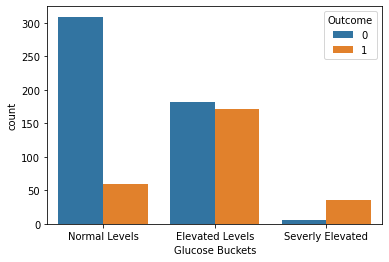

In [104]:
Countplot("Glucose Buckets")

In [105]:
df = df[df['Glucose'] != 0]

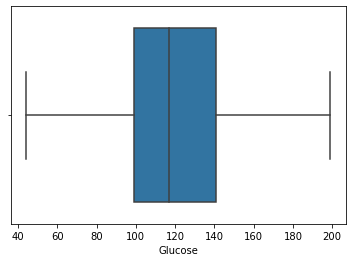

In [106]:
Boxplot('Glucose')

there 's not outlier

# BloodPressure

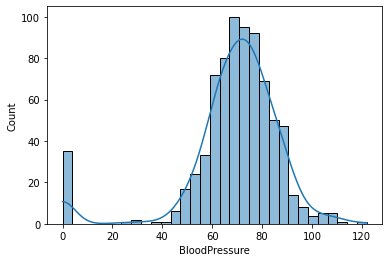

In [107]:
sns.histplot(data = df , x= "BloodPressure",kde = True);

> according to site https://www.webmd.com/hypertension-high-blood-pressure/guide/diastolic-and-systolic-blood-pressure-know-your-numbers

> Normal: Lower than 80

> Stage 1 hypertension: 80-89

> Stage 2 hypertension: 90 or more

> Hypertensive crisis: 120 or more. Call 911

In [108]:
get_zero('BloodPressure')

(35, 4.587155963302752)

In [109]:
df[(df['BloodPressure'] == 0) & (df['Outcome'] == 1) ].shape[0] / df.shape[0] *100

2.0969855832241153

> the BloodPressure can't be equal zero it's impossible so i will fill it with the median value of the BloodPressure

In [110]:
fillna("BloodPressure",'median')

In [111]:
BloodPressure_bins = [0,80,90,120,150]
BloodPressure_labels = ["Normal","Stage 1 hypertension", "Stage 2 hypertension","Hypertensive crisis"]
df["BloodPressure Buckets"] = pd.cut(df["BloodPressure"], BloodPressure_bins, labels = BloodPressure_labels);

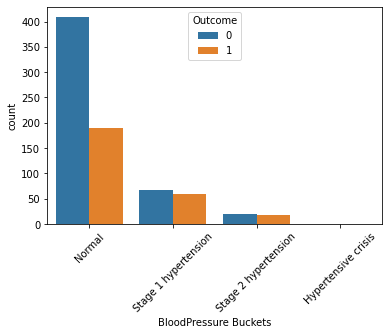

In [112]:
Countplot("BloodPressure Buckets")
plt.xticks(rotation = 45);

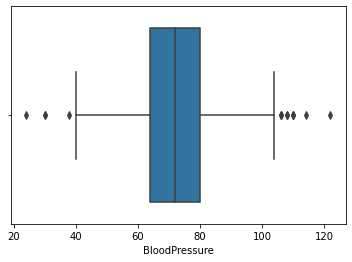

In [113]:
Boxplot('BloodPressure')

there is some outliers and it is normal to find BloodPressure higher than 100 and lower than 40

# BMI

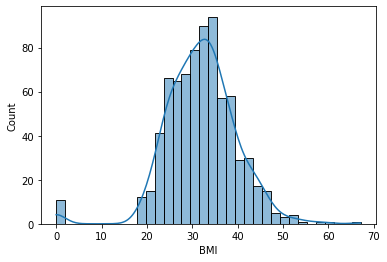

In [114]:
sns.histplot(data = df , x= "BMI",kde = True);

> Your BMI is calculated by multiplying your weight in pounds by 703, dividing the answer by your height in inches, then dividing the answer by your height in inches again.

>A BMI of 18.5-24.9 is considered normal

>25-29.9 is considered overweight

>30-39.9 is classified as obese it causes risks

>and over 39 is very obese it causes risks

If you have A BMI of below 18.5, you are thought to be Underweight . the BMI cann't be equal zero

In [115]:
get_zero('BMI')

(11, 1.4416775884665793)

it is small precentage so i will drop them 

In [116]:
df = df[df['BMI'] != 0]

In [117]:
BMI_bins = [18,25,30,40,68]
BMI_labels = ["Normal","overweight", "obese"," very obese"]
df["BMI Buckets"] = pd.cut(df["BMI"], BMI_bins, labels = BMI_labels);

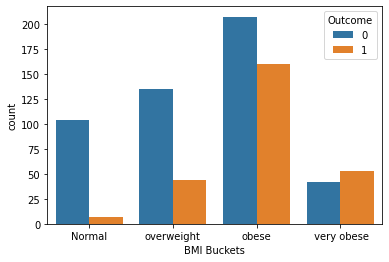

In [118]:
Countplot("BMI Buckets");

it 's observe that when the BMI increase it may cause diabetes specially then BMI > 30

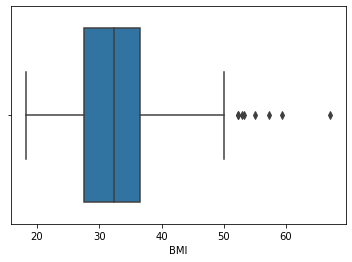

In [119]:
Boxplot('BMI');

In [120]:
df[df['BMI'] > 50].shape[0]

8

there is 8 outliers it is possible for BMI to be higher than 50 so i will keep them

# Insulin

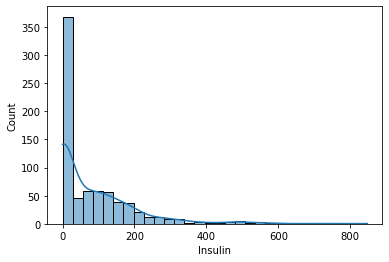

In [121]:
sns.histplot(data = df , x = "Insulin" , kde = True);

> according to site https://emedicine.medscape.com/article/2089224-overview

> it 's said to be 120 (mu U/ml) or lower after 2 hours it 's the normal range

>it 's impossible to be equal zero 

In [122]:
get_zero('Insulin')

(360, 47.87234042553192)

In [123]:
df[(df['Insulin'] == 0) & (df['Outcome'] == 1) ].shape[0] / df.shape[0] *100

17.819148936170212

In [124]:
#df.loc[df['Insulin'] == 0, 'Insulin'] = np.NaN

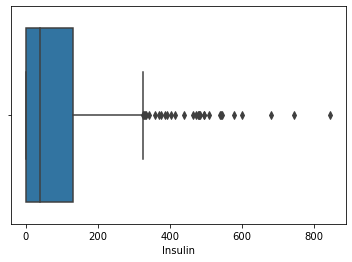

In [125]:
Boxplot('Insulin');

# Pregnancies

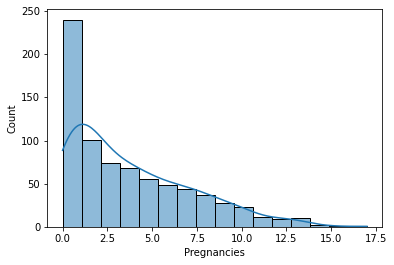

In [126]:
sns.histplot(data = df , x = "Pregnancies", kde=True);

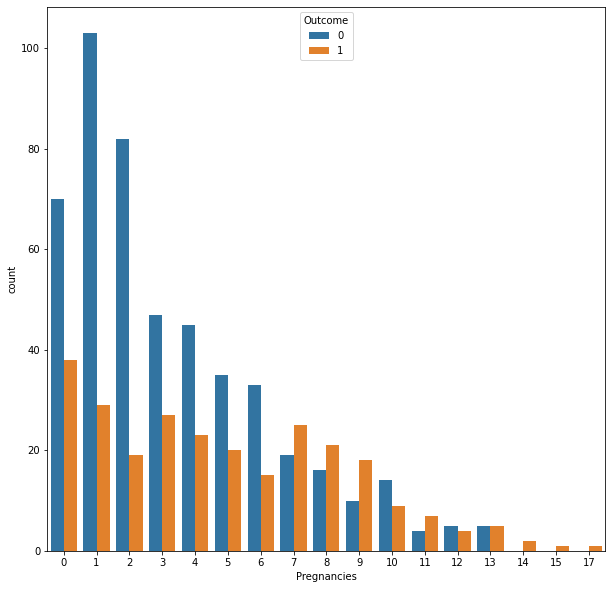

In [127]:
plt.figure(figsize=(10, 10))
Countplot("Pregnancies");

It is clear that with the increase in the number of pregnancies, the mother is exposed to the risk of diabetes

In [128]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose Buckets,BloodPressure Buckets,BMI Buckets
0,6,148,72.0,35.0,0,33.6,0.627,50,1,Elevated Levels,Normal,obese
1,1,85,66.0,29.0,0,26.6,0.351,31,0,Normal Levels,Normal,overweight
2,8,183,64.0,17.0,0,23.3,0.672,32,1,Severly Elevated,Normal,Normal
3,1,89,66.0,23.0,94,28.1,0.167,21,0,Normal Levels,Normal,overweight
4,0,137,40.0,35.0,168,43.1,2.288,33,1,Elevated Levels,Normal,very obese


# Model

In [129]:
X = df.iloc[:,0:8]
y = df['Outcome']

In [130]:
# splitting the data into testing and training data.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [131]:
# scaling the data 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [132]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [133]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of KNN Model is {knn_train_acc}")
print(f"Test Accuracy of KNN Model is {knn_test_acc}")

Training Accuracy of KNN Model is 0.8102836879432624
Test Accuracy of KNN Model is 0.7606382978723404


In [134]:
confusion_matrix(y_test, y_pred)

array([[108,  21],
       [ 24,  35]], dtype=int64)

In [135]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       129
           1       0.62      0.59      0.61        59

    accuracy                           0.76       188
   macro avg       0.72      0.72      0.72       188
weighted avg       0.76      0.76      0.76       188

